#### **Variables to explore for model**
<br>Response variable(s) = Bloom: 1. First bloom, 2. Peak bloom, 3. End bloom
<br>Explanatory variables = Climate: 1. Minimum daily temperature, 2. Maximum daily temparature, 3. Day length
<br>                        Precipitation: 1. Cumulative precipitation, 2. Daily precipitation 
<br>Calculated explanatory variables = Precipitation: 1. Total precipitation in previous 14 days, 2. Total precipitation previous 30 days

<br>**Questions**
<br>1. Are rainfall patterns and bloom patterns related?
<br>2. What species respond to daylength, minimum temperature, or maximum temperature?
<br>
<br>**Hypotheses**
<br>1. Rainfall in the two months before bloom time has larger positive influence on bloom observations than 
<br>rainfall that occurs before the lowest temperature of the water year (October to May).
<br>2. The above effect will be seen more strongly in species that respond more strongly to daylength.

<br>**Considerations**
<br>1. Not all observations will be of plants in bloom.
<br>    - Graphically check outliers and perhaps manually check for bloom using URL

<br>**Descriptive stats**
<br>1. Number of genera in East Bay region.
<br>2. Number of species.
<br>3. Most common species.
<br>4. Plot daylength
<br>5. Plot temperature
<br>6. Plot precipitation
<br>
<br>**Changes to Data**
<br>1. Add URL column to data
<br>2. Add Total precipitation in previous month, Total precipitation previous two months
<br>3. Add week number column ex. week 1 = 0101: 0107, week 2 = 0108:0114

In [5]:
# Import the libraries
import datetime
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#pd.set_option('max_columns', None)

# Climate and daylength EDA

In [8]:

#climate_daylength6 from Cap2_Climate_Daylength_wrangling-customWkWY
#aggreagated features are based on custom defined water year weeks not calendar weeks
climate_daylength = pd.read_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/climate_daylength6.csv')


In [3]:
print(climate_daylength.shape)
print(climate_daylength.columns)
pd.set_option('max_columns', None)
climate_daylength.head()

(12614, 50)
Index(['Unnamed: 0', 'city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 'prec_daily',
       'prec_cum_WY', 'MonSumPrec', 'MonCumPrec', 'WkSumPrec', 'WkCumPrec',
       'minTemp', 'maxTemp', 'MonMaxTemp', 'MonMinTemp', 'MonAvgMaxTemp',
       'MonAvgMinTemp', 'WkMaxTemp', 'WkMinTemp', 'WkAvgMaxTemp',
       'WkAvgMinTemp', 'hour_rise', 'minute_rise', 'hour_set', 'minute_set',
       'day_length', 'MonMaxDayLen', 'MonMinDayLen', 'MonAvgDayLen',
       'WkMaxDayLen', 'WkMinDayLen', 'WkAvgDayLen', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'sum_prec_prior30',
       'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30',
       'AvgMinTemp_prior30', 'MaxDayLen_prior30'],
      dtype='object')


,Unnamed: 0,city,station_id,park,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,prec_daily,prec_cum_WY,MonSumPrec,MonCumPrec,WkSumPrec,WkCumPrec,minTemp,maxTemp,MonMaxTemp,MonMinTemp,MonAvgMaxTemp,MonAvgMinTemp,WkMaxTemp,WkMinTemp,WkAvgMaxTemp,WkAvgMinTemp,hour_rise,minute_rise,hour_set,minute_set,day_length,MonMaxDayLen,MonMinDayLen,MonAvgDayLen,WkMaxDayLen,WkMinDayLen,WkAvgDayLen,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
0,245,Concord,USW00023254,Briones,20170901,2017,9,1,2017,12,45,0.0,0.0,0.03,0.03,0.0,0.0,69.0,111.0,111.0,50.0,87.3,61.2,111.0,62.0,93.875,68.5,6.0,38.0,19.0,38.0,46804.0,46804.0,42623.0,44726.066667,46804.0,45813.0,46309.75,0.0,111.0,69.0,111.00,69.000000,46804.0,0.0,111.0,69.0,111.00,69.000000,46804.0
1,255,Concord,USW00023254,Briones,20170902,2017,9,2,2017,12,45,0.0,0.0,0.03,0.03,0.0,0.0,73.0,110.0,111.0,50.0,87.3,61.2,111.0,62.0,93.875,68.5,6.0,39.0,19.0,37.0,46664.0,46804.0,42623.0,44726.066667,46804.0,45813.0,46309.75,0.0,111.0,69.0,110.50,71.000000,46804.0,0.0,111.0,69.0,110.50,71.000000,46804.0
2,265,Concord,USW00023254,Briones,20170903,2017,9,3,2017,12,45,0.0,0.0,0.03,0.03,0.0,0.0,75.0,106.0,111.0,50.0,87.3,61.2,111.0,62.0,93.875,68.5,6.0,40.0,19.0,35.0,46523.0,46804.0,42623.0,44726.066667,46804.0,45813.0,46309.75,0.0,111.0,69.0,109.00,72.333333,46804.0,0.0,111.0,69.0,109.00,72.333333,46804.0
3,275,Concord,USW00023254,Briones,20170904,2017,9,4,2017,12,45,0.0,0.0,0.03,0.03,0.0,0.0,69.0,88.0,111.0,50.0,87.3,61.2,111.0,62.0,93.875,68.5,6.0,41.0,19.0,34.0,46381.0,46804.0,42623.0,44726.066667,46804.0,45813.0,46309.75,0.0,111.0,69.0,103.75,71.500000,46804.0,0.0,111.0,69.0,103.75,71.500000,46804.0
4,285,Concord,USW00023254,Briones,20170905,2017,9,5,2017,12,45,0.0,0.0,0.03,0.03,0.0,0.0,70.0,90.0,111.0,50.0,87.3,61.2,111.0,62.0,93.875,68.5,6.0,42.0,19.0,32.0,46240.0,46804.0,42623.0,44726.066667,46804.0,45813.0,46309.75,0.0,111.0,69.0,101.00,71.200000,46804.0,0.0,111.0,69.0,101.00,71.200000,46804.0


In [4]:
#start at beginning of 2017 water year
climate_daylength = climate_daylength[climate_daylength['plain_dates']>=20171001]
#climate_daylength = climate_daylength[climate_daylength['WY'].isin(['2018', '2019', '2020', '2021', '2022'])]

climate_daylength.shape

(12404, 50)

In [5]:
df = climate_daylength
df.head()

,Unnamed: 0,city,station_id,park,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,prec_daily,prec_cum_WY,MonSumPrec,MonCumPrec,WkSumPrec,WkCumPrec,minTemp,maxTemp,MonMaxTemp,MonMinTemp,MonAvgMaxTemp,MonAvgMinTemp,WkMaxTemp,WkMinTemp,WkAvgMaxTemp,WkAvgMinTemp,hour_rise,minute_rise,hour_set,minute_set,day_length,MonMaxDayLen,MonMinDayLen,MonAvgDayLen,WkMaxDayLen,WkMinDayLen,WkAvgDayLen,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
30,545,Concord,USW00023254,Briones,20171001,2017,10,1,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,53.0,85.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,4.0,18.0,52.0,42478.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,83.500000,55.857143,44370.0,0.03,110.0,50.0,86.433333,60.666667,46664.0
31,555,Concord,USW00023254,Briones,20171002,2017,10,2,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,83.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,5.0,18.0,50.0,42332.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,83.785714,55.357143,44225.0,0.03,106.0,50.0,85.533333,60.066667,46523.0
32,565,Concord,USW00023254,Briones,20171003,2017,10,3,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,50.0,79.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,6.0,18.0,49.0,42187.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,83.714286,54.785714,44080.0,0.03,101.0,50.0,84.633333,59.233333,46381.0
33,575,Concord,USW00023254,Briones,20171004,2017,10,4,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,50.0,82.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,7.0,18.0,47.0,42042.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,84.214286,54.071429,43934.0,0.03,101.0,50.0,84.433333,58.600000,46240.0
34,585,Concord,USW00023254,Briones,20171005,2017,10,5,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,50.0,86.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,8.0,18.0,46.0,41897.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,85.071429,53.714286,43788.0,0.03,101.0,50.0,84.300000,57.933333,46098.0


In [6]:
#add leading zeros to single digit week numbers
df['WYwk_yr'] = pd.to_numeric(df['WY'].astype(str)+df['WY_weeknum'].astype(str).str.zfill(2))
df['WYwk_yr_str'] = df['WYwk_yr'].astype(str)
df['WY_weeknum_str'] = df['WY_weeknum'].astype(str)
#df.info()

In [7]:
#export file as csv
#df.to_csv('/Users/sandidge/Desktop/df_check2.csv')


In [8]:
df.columns

Index(['Unnamed: 0', 'city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 'prec_daily',
       'prec_cum_WY', 'MonSumPrec', 'MonCumPrec', 'WkSumPrec', 'WkCumPrec',
       'minTemp', 'maxTemp', 'MonMaxTemp', 'MonMinTemp', 'MonAvgMaxTemp',
       'MonAvgMinTemp', 'WkMaxTemp', 'WkMinTemp', 'WkAvgMaxTemp',
       'WkAvgMinTemp', 'hour_rise', 'minute_rise', 'hour_set', 'minute_set',
       'day_length', 'MonMaxDayLen', 'MonMinDayLen', 'MonAvgDayLen',
       'WkMaxDayLen', 'WkMinDayLen', 'WkAvgDayLen', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'sum_prec_prior30',
       'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30',
       'AvgMinTemp_prior30', 'MaxDayLen_prior30', 'WYwk_yr', 'WYwk_yr_str',
       'WY_weeknum_str'],
      dtype='object')

In [9]:
vars_corr = df[['city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 
       'prec_daily', 'prec_cum_WY', 'sum_prec_prior14', 'sum_prec_prior30',
       'MaxTemp_prior14', 'AvgMaxTemp_prior14',
       'MinTemp_prior14', 'AvgMinTemp_prior14',  
       'MaxTemp_prior30', 'AvgMaxTemp_prior30',
       'MinTemp_prior30', 'AvgMinTemp_prior30', 
       'day_length', 'MaxDayLen_prior14','MaxDayLen_prior30']]

# Correlation of climate and daylength variables

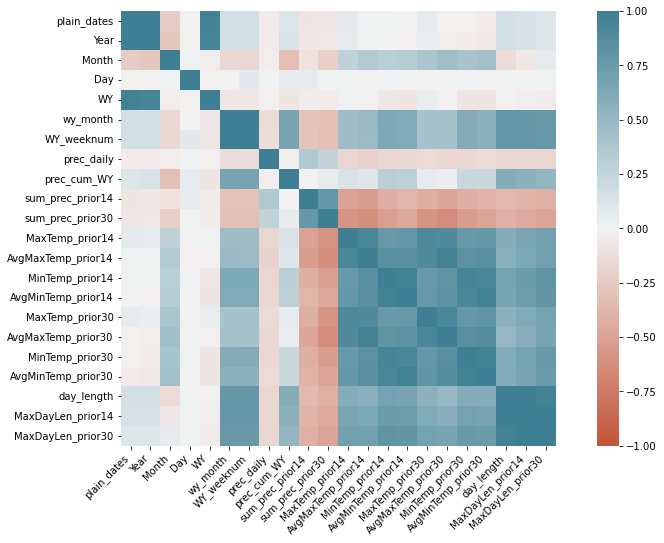

In [10]:
corr = vars_corr.corr()
plt.figure(figsize = (15,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Summary:**
<br>- Precipitation and temperature have a somewhat negative correlation, as expected (rain in winter).
<br>- Sum of precipitation in prior 14 is not correlated to cumulative annual precipitation.
<br>- Daylength looks lightly negatively correlated with sum of precipitation and poitively correlated with temperature.
<br>- Daylength values daily, 14 day, and 30 day all behave similarly.
<br>- The 14 and 30 day periods of same feature are fairly positively correlated, as expected
<br>
<br>**Model feature combinations**
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior14', 'MinTemp_prior14'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior30', 'MaxTemp_prior30', 'MinTemp_prior30'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior30', 'MaxTemp_prior14', 'MinTemp_prior14'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior30', 'MinTemp_prior30'


# Variation in temperature and precipitation across study period

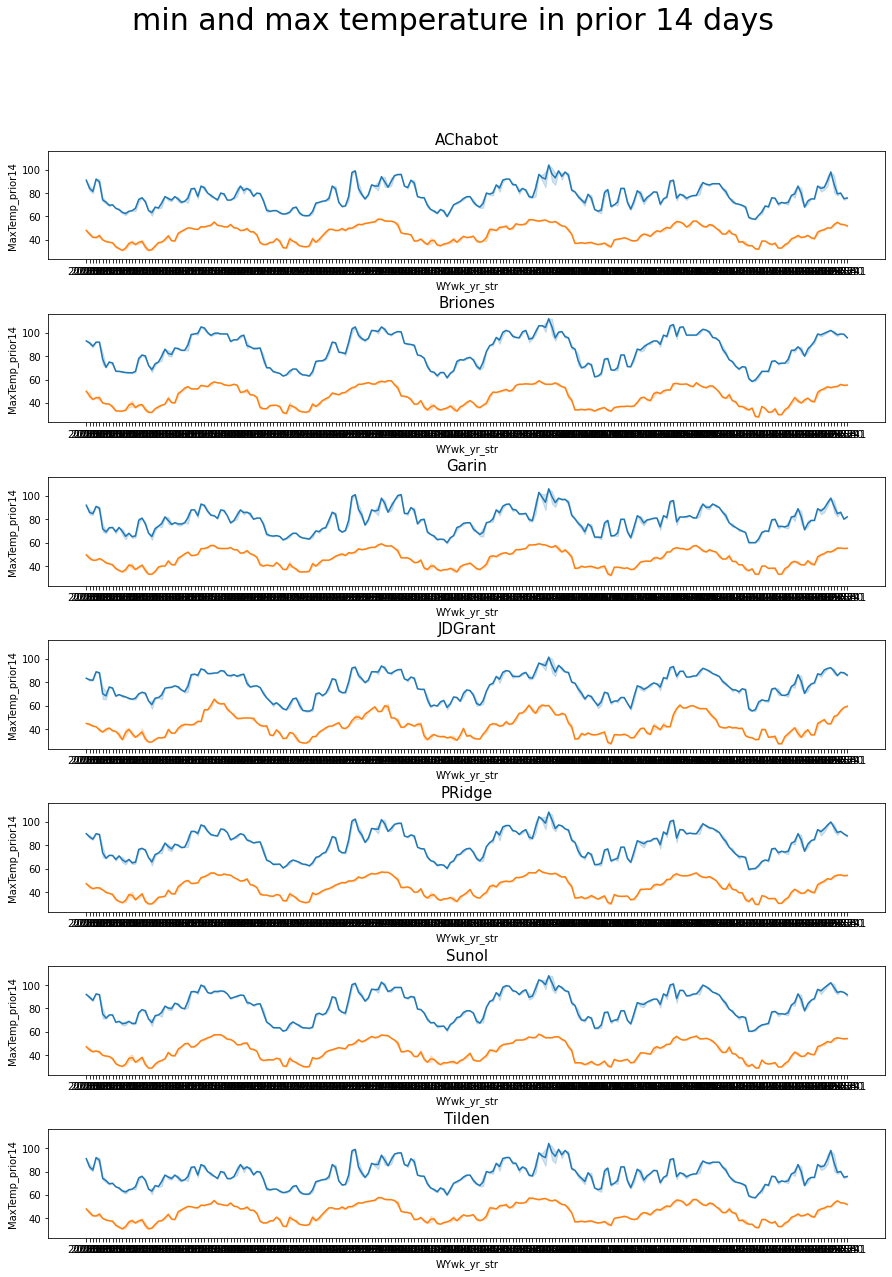

In [11]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('min and max temperature in prior 14 days', fontsize=30)

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MaxTemp_prior14')
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MinTemp_prior14')
    axes[a].set_title(p, fontsize=15)




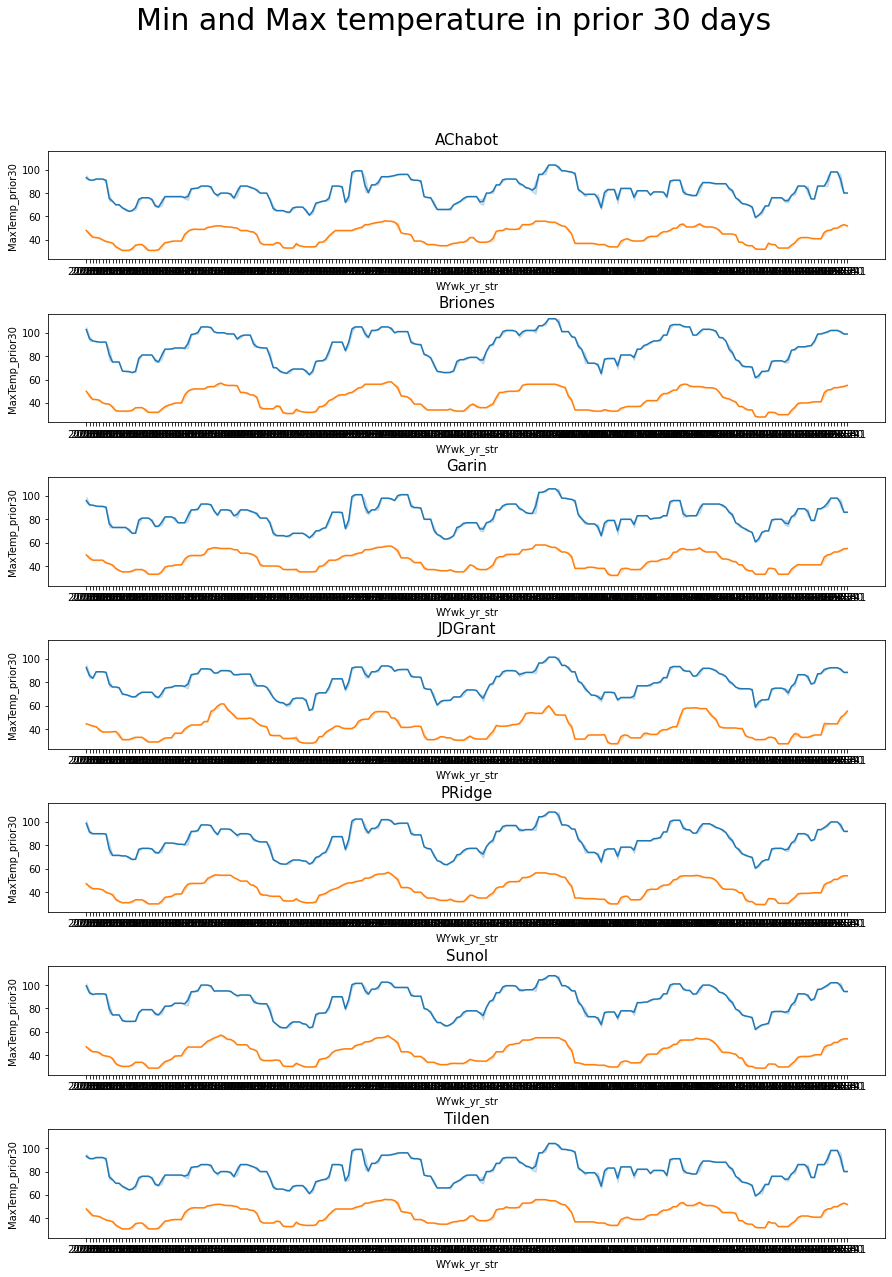

In [12]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Min and Max temperature in prior 30 days', fontsize=30)

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MaxTemp_prior30')
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MinTemp_prior30')
    axes[a].set_title(p, fontsize=15)




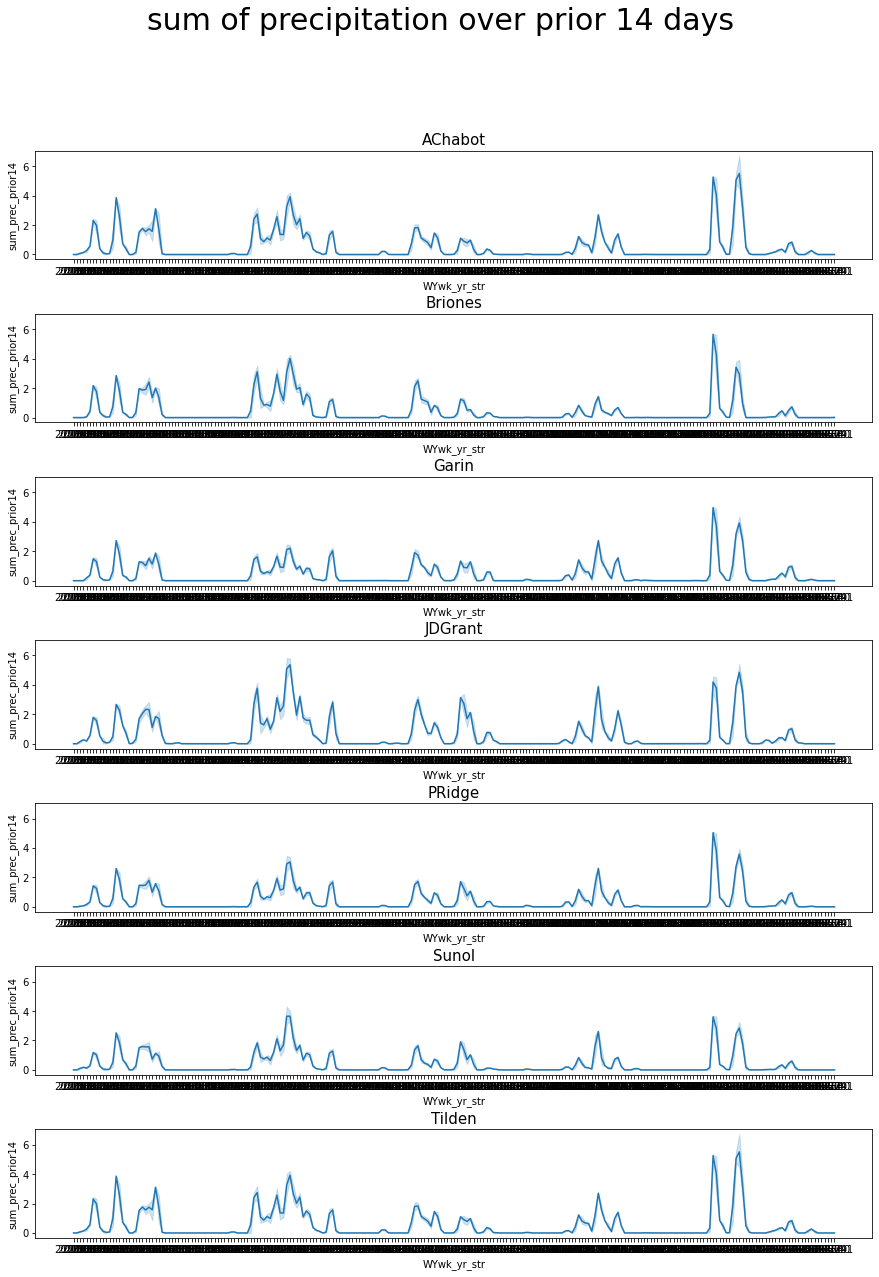

In [13]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('sum of precipitation over prior 14 days', fontsize=30)

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='sum_prec_prior14')
    axes[a].set_title(p, fontsize=15)

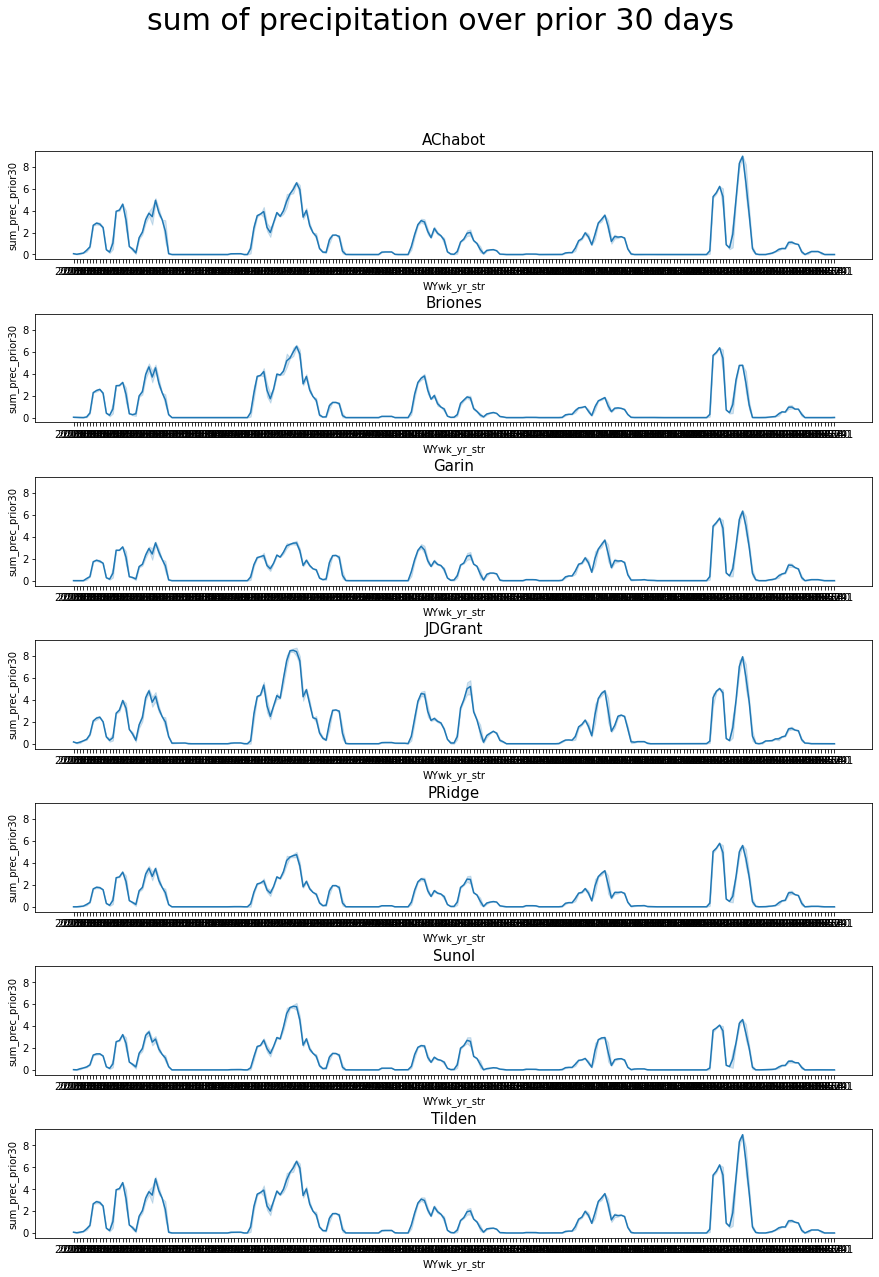

In [14]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('sum of precipitation over prior 30 days', fontsize=30)

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='sum_prec_prior30')
    axes[a].set_title(p, fontsize=15)



# Weekly Climate and Daylength plots

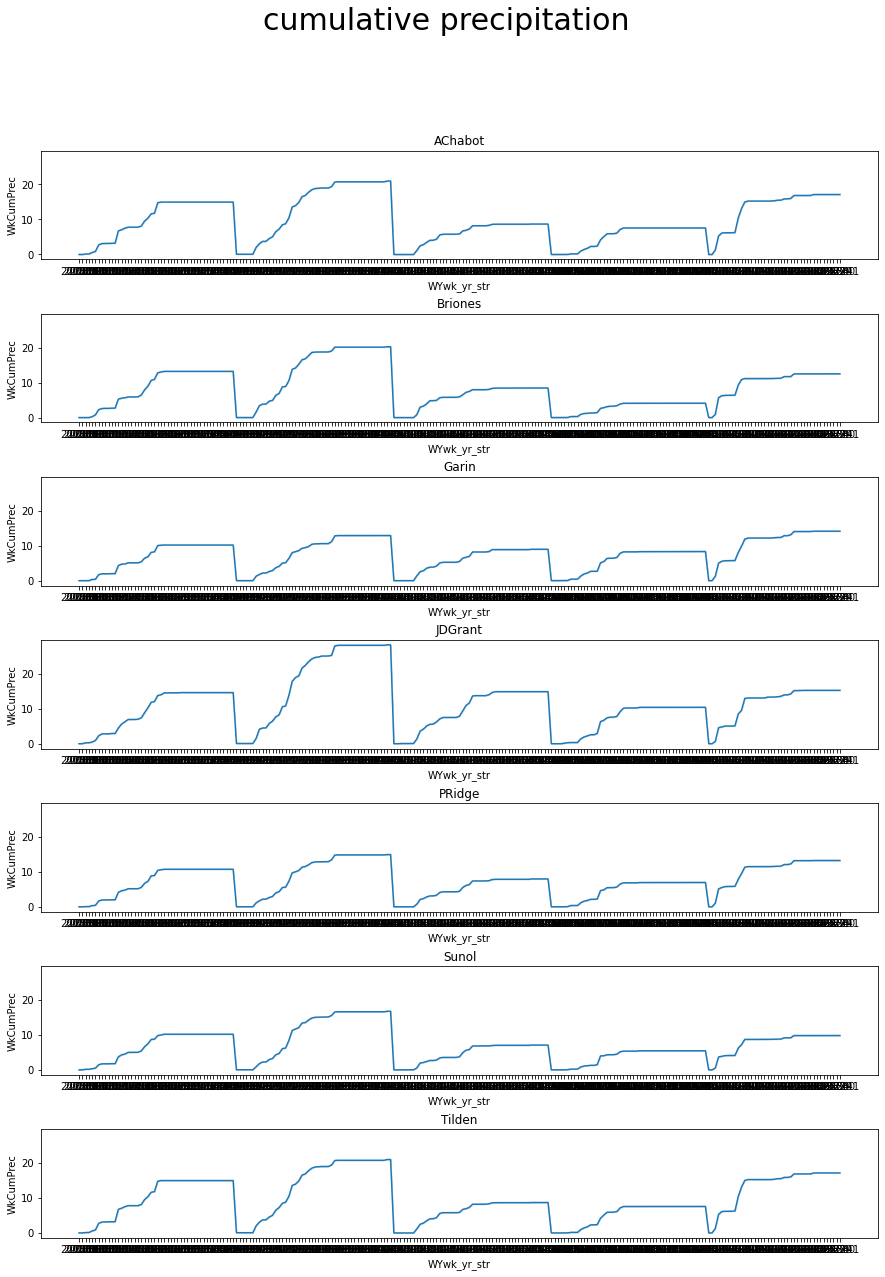

In [15]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('cumulative precipitation', fontsize=30)

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y="WkCumPrec")
    axes[a].set_title(p, fontsize=12)



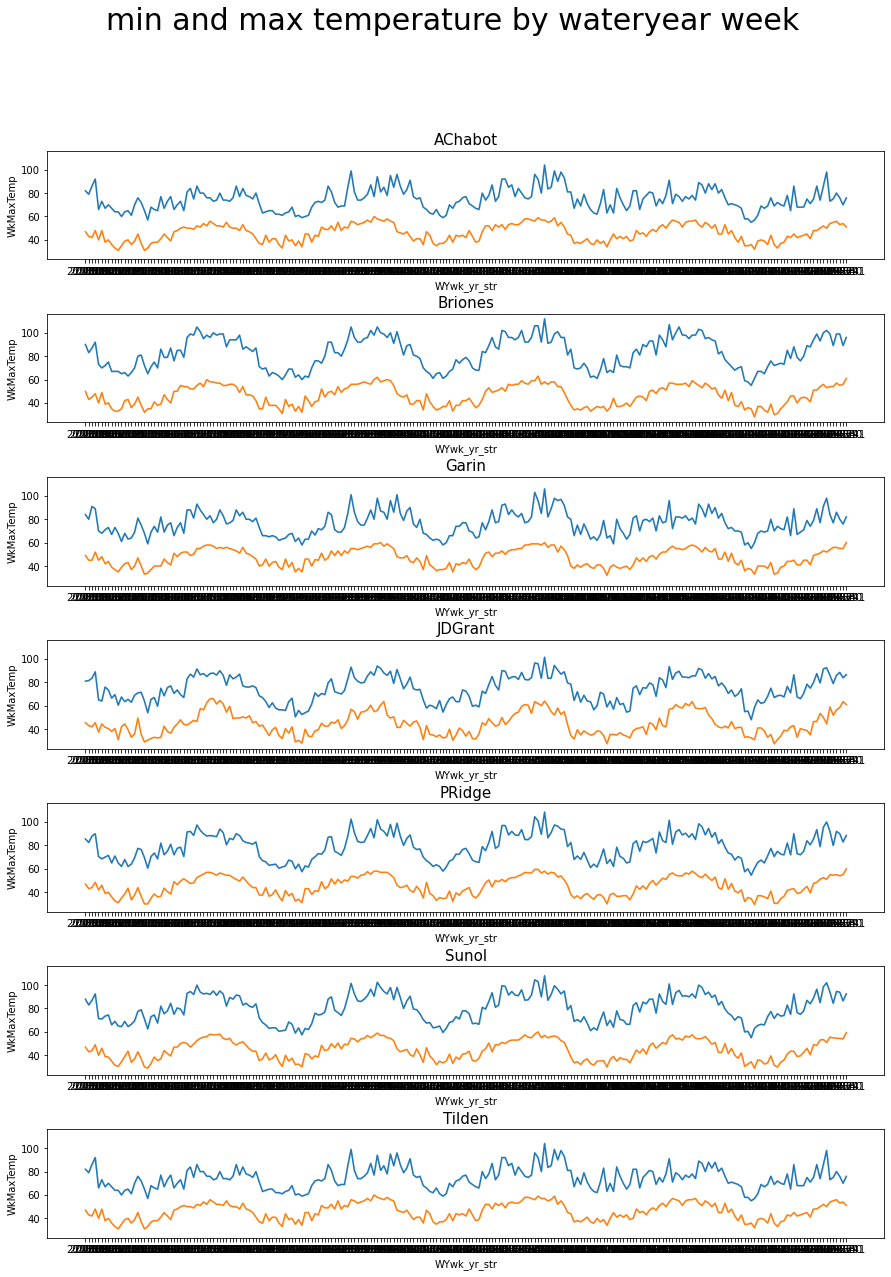

In [16]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('min and max temperature by wateryear week', fontsize=30)

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y="WkMaxTemp")
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y="WkMinTemp")
    axes[a].set_title(p, fontsize=15)




_______________________________
# Wildflower observation EDA

# Import data

In [6]:

#import combined wildflower, climate, daylength data and store as a dataframe 'df'
df = pd.read_csv ('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/wildflower_df_Aug18.csv')
print(df.shape)
df.head()


(16228, 40)


,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,...,AvgMinTemp_prior14,MaxDayLen_prior14,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30,url,image_url
0,8246824,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,53.035714,44071.0,0.02,97.5,47.0,82.866667,57.933333,46338.0,https://www.inaturalist.org/observations/8246824,https://inaturalist-open-data.s3.amazonaws.com...
1,8246895,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,53.035714,44071.0,0.02,97.5,47.0,82.866667,57.933333,46338.0,https://www.inaturalist.org/observations/8246895,https://inaturalist-open-data.s3.amazonaws.com...
2,8246955,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,53.035714,44071.0,0.02,97.5,47.0,82.866667,57.933333,46338.0,https://www.inaturalist.org/observations/8246955,https://inaturalist-open-data.s3.amazonaws.com...
3,8246986,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,53.035714,44071.0,0.02,97.5,47.0,82.866667,57.933333,46338.0,https://www.inaturalist.org/observations/8246986,https://inaturalist-open-data.s3.amazonaws.com...
4,8246988,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,53.035714,44071.0,0.02,97.5,47.0,82.866667,57.933333,46338.0,https://www.inaturalist.org/observations/8246988,https://inaturalist-open-data.s3.amazonaws.com...


In [7]:
print(df.shape)
print('Parks in dataset: ',df['park'].unique())
print(df.columns)


(16228, 40)
Parks in dataset:  ['Sunol' 'PRidge' 'Briones' 'Tilden' 'AChabot' 'JDGrant' 'Garin']
Index(['id', 'park', 'date', 'plain_dates', 'Year', 'Month', 'Day', 'WY',
       'wy_month', 'WY_weeknum', 'genus_species', 'genus', 'species',
       'latitude', 'longitude', 'prec_daily', 'prec_cum_WY', 'MonSumPrec',
       'WkSumPrec', 'minTemp', 'maxTemp', 'hour_rise', 'minute_rise',
       'hour_set', 'minute_set', 'day_length', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'sum_prec_prior30',
       'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30',
       'AvgMinTemp_prior30', 'MaxDayLen_prior30', 'url', 'image_url'],
      dtype='object')


In [8]:
#select columns and reorder
df = df[['id', 'park',
         'date','plain_dates', 'Year','Month', 'Day', 'WY', 
         'wy_month', 'WY_weeknum',
         'genus_species', 'genus','species', 
         'latitude', 'longitude',
         'url', 'image_url',
         'minTemp', 'maxTemp', 'day_length',
         'prec_daily', 'prec_cum_WY', 'MonSumPrec', 'WkSumPrec', 'sum_prec_prior14', 'sum_prec_prior30',
         'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 'MaxDayLen_prior14',
         'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 'MaxDayLen_prior30',
                      ]]
df.head(3)


,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,...,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
0,8246824,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,92.0,47.0,80.964286,53.035714,44071.0,97.5,47.0,82.866667,57.933333,46338.0
1,8246895,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,92.0,47.0,80.964286,53.035714,44071.0,97.5,47.0,82.866667,57.933333,46338.0
2,8246955,Sunol,2017-10-03,20171003,2017,10,3,2018,1,1,...,92.0,47.0,80.964286,53.035714,44071.0,97.5,47.0,82.866667,57.933333,46338.0


___________________
# Filter for: plant type, seasonality, and overall abundance

**Run the Data Preparation section at top first**
<br>**Drop flowering shrubs and plants with non-showy flowers**

In [9]:
#see number of genera before dropping shrub-type plants
print('            all:', df.shape, len(np.unique(df['genus'])))

#drop shrub-type genera 
shrub_drop = ['Rubus', 'Baccharis', 'Artemisia', 'Cotoneaster', 'Heteromeles', 'Ilex', 'Cornus', 'Symphoricarpos',
           'Frangula', 'Lonicera', 'Ribes', 'Corylus', 'Diplacus', 'Genista', 'Dirca', 'Oemleria']     
            #blackberry, coyote bush, sage brush, contoneaster, toyon, holly, dogwood, snowberry, alder buckthorn
df = df[~df['genus'].isin(shrub_drop)]
print('no trees shrubs:', df.shape, len(np.unique(df['genus'])))

#drop plants with non-showy flowers
small_flower_drop = ['Euphorbia', 'Claytonia', 'Fragaria', 'Marah'] 
df = df[~df['genus'].isin(small_flower_drop)]
print('no small flower:', df.shape, len(np.unique(df['genus'])))


            all: (16228, 36) 361
no trees shrubs: (13967, 36) 345
no small flower: (13448, 36) 341


# Filter for the most common species

In [10]:
#get observation counts for each species
counts_sp = df.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')

#Get species with at least 30 observations
sp30 = counts_sp[counts_sp['count']>30]
#sp30.head(10)

#Get species with at least 100 observations
sp100 = counts_sp[counts_sp['count']>100]
#sp100.head(10)

#create list of species names to filter by
#species = list(sp30['genus_species'])
species = list(sp100['genus_species'])
print('You have',len(species), 'species with greater than 100 observations')
#print(species)

#drop species with fewer than n observations
df = df[df['genus_species'].isin(species)]
df.shape

You have 33 species with greater than 100 observations


(5712, 36)

In [11]:
#get observation counts for each species
gen_sp = df.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')
print(gen_sp.head(50))

               genus_species  count
0        Sisyrinchium bellum    391
1   Eschscholzia californica    357
2         Castilleja exserta    300
3    Dipterostemon capitatus    251
4     Trillium chloropetalum    239
5      Calandrinia menziesii    223
6             Triteleia laxa    222
7   Chlorogalum pomeridianum    198
8            Adelinia grande    191
9              Vicia villosa    190
10         Calochortus albus    176
11      Achillea millefolium    170
12          Conium maculatum    169
13          Dipsacus sativus    169
14       Sidalcea malviflora    162
15       Lysimachia arvensis    155
16         Viola pedunculata    150
17         Heracleum maximum    146
18         Bellardia trixago    145
19           Cirsium vulgare    144
20     Cardamine californica    143
21       Lathyrus latifolius    137
22       Clarkia unguiculata    136
23  Scrophularia californica    131
24            Erodium botrys    127
25   Ranunculus californicus    124
26          Silybum marianum

____________________________________________
# Observations by Month
<br>Produces a filtered list of species names for plants that have a spring/summer seasonality.
<br>Filters herbaceous wildflowers woth at least 30 observations in the dataset
<br>and 85% of observations falling between January and July.

# Filter dataframe for seasonality

In [12]:
#Table of observation frequency for each species by month
sp_mo_tab = pd.get_dummies(df.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#rename columns as month names
sp_mo_tab.columns = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#wreset index to species_genus and reorder by water year months
tab_mo_wy = sp_mo_tab.reset_index().sort_values(by = 'Apr', ascending = False)
tab_mo_wy = tab_mo_wy[['genus_species','Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

#count the months where plant does not appear
tab_mo_wy['mo_tab_mo_wy'] = tab_mo_wy.isin([0]).sum(axis=1)

#engineer  variables the get seasonality
tab_mo_wy['obsY'] = tab_mo_wy.iloc[:,1:13].sum(axis=1) #number of observations in all months all years
tab_mo_wy['obsS'] = tab_mo_wy.iloc[:,4:11].sum(axis=1) #number of observations in Jan-July all years
tab_mo_wy['obsP'] = tab_mo_wy['obsS']/tab_mo_wy['obsY'] #proportion of observations in Jan-July all years

#only keep species with at least 85% of observations falling between January and July
tab_spring_flowers = tab_mo_wy[tab_mo_wy['obsP']>.85].sort_values(by = 'mo_tab_mo_wy')
#list of species to include and filter df
spring_flowers_names = list(tab_spring_flowers['genus_species'])
print('There are', (len(spring_flowers_names)), 'species')
tab_spring_flowers.head(10)

There are 32 species


,genus_species,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,mo_tab_mo_wy,obsY,obsS,obsP
13,Dipsacus sativus,7,6,2,7,5,9,14,38,38,33,5,5,0,169,144,0.852071
16,Eschscholzia californica,13,5,3,12,36,88,111,50,19,9,5,6,0,357,325,0.910364
26,Silybum marianum,4,0,3,8,9,7,22,33,24,5,1,3,1,119,108,0.907563
12,Conium maculatum,4,1,3,6,15,18,37,41,29,14,0,1,1,169,160,0.946746
7,Chlorogalum pomeridianum,1,3,7,14,19,34,38,32,37,12,0,1,1,198,186,0.939394
0,Achillea millefolium,1,3,3,5,18,12,55,61,6,5,1,0,1,170,162,0.952941
22,Plantago lanceolata,5,0,2,3,4,17,47,18,2,2,2,0,2,102,93,0.911765
31,Vicia villosa,1,0,0,0,7,33,95,44,5,2,1,2,3,190,186,0.978947
21,Myosotis latifolia,2,0,2,9,8,32,34,17,5,3,0,0,3,112,108,0.964286
24,Scrophularia californica,0,1,2,6,7,20,46,38,8,3,0,0,3,131,128,0.977099


**summary**
<br>March through May is peak bloom season in the East Bay and 47 species bloom primarily in the spring months

Text(0.5, 1.0, 'Adelinia grande\n observations by month over five years')

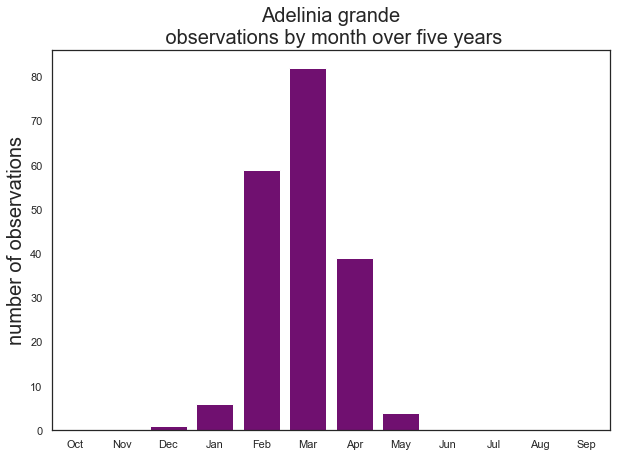

In [13]:
A_grande = tab_spring_flowers[tab_spring_flowers['genus_species']=='Adelinia grande']
y = A_grande[['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']]
bar_A_grande = y.T.reset_index()
bar_A_grande.columns =['month', 'frequency']
#bar_A_grande

# Set the figure size
plt.figure(figsize=(10, 7))

sns.set_theme(style='white')
#sns.set(font_scale=2)
#.set(title='Adelinia grande\n number of observations by month')

sns.barplot(data=bar_A_grande, x='month', y='frequency', color='purple')
plt.xlabel('', fontsize=20)
plt.ylabel('number of observations', fontsize=20)
plt.title('Adelinia grande\n observations by month over five years', fontsize=20)

# Filter observation dataframe, df
<br>only flowers with at least %85 of observations happening between Jan and July

In [14]:
#filter df for spring flowers
df = df[df['genus_species'].isin(spring_flowers_names)]

print(df['park'].unique())
print(df.shape)
df.head(3)

['Sunol' 'PRidge' 'Briones' 'Tilden' 'AChabot' 'JDGrant' 'Garin']
(5568, 36)


,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,...,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
31,9814624,Sunol,2018-02-10,20180210,2018,2,10,2018,5,18,...,79.0,41.0,72.750000,44.285714,38302.0,79.0,34.0,65.966667,43.433333,38302.0
34,9827799,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,...,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
36,9827824,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,...,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0


_____________________________
**drop observations of plant observed while not-in-bloom NEEDS UPDATE new parks**

In [17]:
#export csv for manually checking observation URLs for bloom or not in bloom
#df.to_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/df_spring_check.csv')


In [18]:

##has too many non_bloom photos, prob drop 
sp_drop2 = ['Achillea millefolium', 'Claytonia perfoliata', 'Conium maculatum', 'Heracleum maximum', 
            'Plantago lanceolata', 'Silybum marianum']     

df = df[~df['genus_species'].isin(sp_drop2)]
print(df.shape)

#drop large chunk of Chlorogalum that are not in bloom
Clorogalum_nb = df[(df['WY_weeknum']<=32)&(df['genus_species']=='Chlorogalum pomeridianum')]
Clorogalum_nb_id = list(Clorogalum_nb['id'])

df = df[~df['id'].isin(Clorogalum_nb_id)]
print(df.shape)

#drop individual observations of plants not in bloom NEEDS UPDATE from new parks
drop_obs = [103777746, 104688829, 9595741, 9722099, 32489521, 73352478, 76450519, 77643266, 
            24247440, 43658175, 44399346, 76450519, 77643266, 38693200, 63487951, 71183462, 
            42102496, 68344012, 68840644, 47898194, 29300684, 70592006, 28311629, 54581777, 
            32559219, 34652040, 8639429, 37289693, 9346500, 26422498, 55725103, 108074080, 
            76424590, 77513843, 115187896, 24261569,24873642, 44057669, 48205375, 14401118,
            20071583, 106086527, 69827680, 44347209, 44188466, 101158448, 9263291, 104253911, 
            68346183, 105931527, 38206305, 106072345, 106520883, 38697858, 77618490, 108196893, 
            20964995, 39732637, 39893094, 72140861, 72540570, 31928196] 

df = df[~df['id'].isin(drop_obs)]
print(df.shape)

#export csv for checking
#df.to_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/df_check.csv')



(8741, 36)
(8522, 36)
(8435, 36)


In [19]:
df.head()

,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,genus_species,genus,species,latitude,longitude,url,image_url,minTemp,maxTemp,day_length,prec_daily,prec_cum_WY,MonSumPrec,WkSumPrec,sum_prec_prior14,sum_prec_prior30,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
31,9814624,Sunol,2018-02-10,20180210,2018,2,10,2018,5,18,Adelinia grande,Adelinia,grande,37.513283,-121.845250,https://www.inaturalist.org/observations/9814624,https://inaturalist-open-data.s3.amazonaws.com...,45.0,71.0,38302.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,41.0,72.750000,44.285714,38302.0,79.0,34.0,65.966667,43.433333,38302.0
32,9827460,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Sanicula crassicaulis,Sanicula,crassicaulis,37.508262,-121.811393,https://www.inaturalist.org/observations/9827460,https://static.inaturalist.org/photos/13454749...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
34,9827799,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Cardamine californica,Cardamine,californica,37.526564,-121.826961,https://www.inaturalist.org/observations/9827799,https://static.inaturalist.org/photos/13455255...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
36,9827824,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Dipterostemon capitatus,Dipterostemon,capitatus,37.527739,-121.823465,https://www.inaturalist.org/observations/9827824,https://static.inaturalist.org/photos/13455312...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
37,9827837,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Ranunculus californicus,Ranunculus,californicus,37.526897,-121.832491,https://www.inaturalist.org/observations/9827837,https://static.inaturalist.org/photos/13455360...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0


**summary of spring flower species included in dataset**

In [20]:
#number of species in spring dataset
spring_species_names = df['genus_species'].unique()
print('There are', len(df['genus_species'].unique()), 'species in the common spring flowers dataset')

There are 42 species in the common spring flowers dataset


In [21]:
#number of observations by species
spring_counts = df.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')
print(spring_counts.head(20))
#get list of top n names
spring_top_20 = spring_counts['genus_species'].iloc[:20]
#print(list(spring_top_20))


               genus_species  count
0        Sisyrinchium bellum    562
1   Eschscholzia californica    476
2     Trillium chloropetalum    415
3         Castilleja exserta    385
4    Dipterostemon capitatus    345
5             Triteleia laxa    290
6           Dipsacus sativus    274
7        Lathyrus latifolius    262
8            Adelinia grande    257
9          Calochortus albus    255
10       Sidalcea malviflora    251
11     Calandrinia menziesii    239
12       Lysimachia arvensis    231
13             Vicia villosa    226
14             Taraxia ovata    223
15         Bellardia trixago    219
16        Myosotis latifolia    216
17  Scrophularia californica    187
18     Maianthemum stellatum    186
19     Cardamine californica    182


In [22]:
#Table of number of observations of spring species by month
df_month = df.groupby(['Month'])['Month'].count().reset_index(name='count')
print(df_month.head(12))

    Month  count
0       1    118
1       2    684
2       3   1707
3       4   2841
4       5   1777
5       6    787
6       7    313
7       8     74
8       9     33
9      10     40
10     11     28
11     12     33


**summary of spring dataset**
<br>- There are 42 species in the common spring flowers dataset
<br>
<br>- The top 20 most common (in order from most common) are:
<br>'Sisyrinchium bellum', 'Eschscholzia californica', 'Trillium chloropetalum', 'Castilleja exserta', 
<br>'Dipterostemon capitatus', 'Triteleia laxa', 'Dipsacus sativus', 'Lathyrus latifolius',
<br>'Adelinia grande', 'Calochortus albus', 'Sidalcea malviflora', 'Calandrinia menziesii', 
<br>'Lysimachia arvensis', 'Vicia villosa', 'Taraxia ovata', 'Bellardia trixago', 
<br>'Myosotis latifolia', 'Scrophularia californica', 'Maianthemum stellatum', 'Cardamine californica'
<br>
<br>- March through May is peak bloom time

_______________
# Observations by water year week
<br>There are 48 weeks in a water year. Each water year month (calendar month) is divided into 4 "weeks"
<br>Week 1 = 8 days, week 2 = 7 days, week 3 = 9 days, week 4 = remaining days
<br>

In [23]:
#number of observations by week
df_week_counts = df.groupby(['WY_weeknum'])['WY_weeknum'].count().reset_index(name='count')

df_week_counts.T.head(48)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
WY_weeknum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
count,17,14,7,2,8,5,8,7,1,11,10,11,11,17,37,53,123,138,266,157,313,279,549,566,618,591,564,1068,709,373,338,357,330,174,172,111,118,79,64,52,35,12,18,9,20,7,1,5


In [24]:
#df['genus_species'].unique()
#df['park'].unique()

In [25]:
df.head()

,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,genus_species,genus,species,latitude,longitude,url,image_url,minTemp,maxTemp,day_length,prec_daily,prec_cum_WY,MonSumPrec,WkSumPrec,sum_prec_prior14,sum_prec_prior30,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
31,9814624,Sunol,2018-02-10,20180210,2018,2,10,2018,5,18,Adelinia grande,Adelinia,grande,37.513283,-121.845250,https://www.inaturalist.org/observations/9814624,https://inaturalist-open-data.s3.amazonaws.com...,45.0,71.0,38302.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,41.0,72.750000,44.285714,38302.0,79.0,34.0,65.966667,43.433333,38302.0
32,9827460,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Sanicula crassicaulis,Sanicula,crassicaulis,37.508262,-121.811393,https://www.inaturalist.org/observations/9827460,https://static.inaturalist.org/photos/13454749...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
34,9827799,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Cardamine californica,Cardamine,californica,37.526564,-121.826961,https://www.inaturalist.org/observations/9827799,https://static.inaturalist.org/photos/13455255...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
36,9827824,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Dipterostemon capitatus,Dipterostemon,capitatus,37.527739,-121.823465,https://www.inaturalist.org/observations/9827824,https://static.inaturalist.org/photos/13455312...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
37,9827837,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Ranunculus californicus,Ranunculus,californicus,37.526897,-121.832491,https://www.inaturalist.org/observations/9827837,https://static.inaturalist.org/photos/13455360...,39.0,62.0,38432.0,0.0,5.01,0.44,0.0,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0


_______________________
**By park and water year**

In [26]:
#Get table for each park and water year

column_names =['genus_species', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', 'park', 'wy']

#initialize empty dataframe
tab_mo_wy = pd.DataFrame(columns = column_names)

#park = ['Briones', 'Sunol', 'Tilden']
park = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
years = [2018, 2019, 2020, 2021, 2022]
ax_cols1 = range(len(years))

for p in park:
    for y in years:
        df_temp = df[(df['park']== p) & (df['WY']==y)]
        tab_mo_temp = pd.get_dummies(df_temp.set_index('genus_species')['WY_weeknum']).groupby('genus_species').sum().reset_index()
        tab_mo_temp['park'] = p
        tab_mo_temp['wy'] = y
        tab_mo_temp.columns = tab_mo_temp.columns.astype(str)
        tab_mo_wy = pd.concat([tab_mo_wy, tab_mo_temp], axis=0)
    
    
tab_mo_wy = tab_mo_wy.fillna(0)
#tab_mo_wy.head(30)

In [27]:
#set genus_species, park, and water year as index/row names, leaving only numerical data
print(tab_mo_wy['park'].unique())
tab_wk = tab_mo_wy.set_index(['genus_species', 'park','wy'])
#convert values to int64
tab_wk = tab_wk.astype('int64')

#look for missing weeks/columns and create columns of zero values
#print(tab_wk.columns)
#create zero-valued columns as needed
#tab_wk[5]=0

tab_wk.head()

['AChabot' 'Briones' 'Garin' 'JDGrant' 'PRidge' 'Sunol' 'Tilden']


,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
genus_species,park,wy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelinia grande,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Calochortus albus,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Calochortus luteus,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cardamine californica,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Castilleja exserta,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
#check data types and spread
#tab_wk.info()

In [29]:
#export csv for checking
#py_wk_tab_all.to_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/py_wk_tab_all.csv')


_________________________
# Get response variables: first, peak, last bloom weeks and bloom duration

In [30]:
#get first, last bloom, each water year 

#table of non-zero values
mask_all = tab_wk > 0     

#Create abundance table with response variables: 
#first week in bloom, last week in bloom, peak bloom month, and bloom duration

#get response variables, first week with bloom and last week with bloom
response_start_end = tab_wk.assign(start=mask_all.idxmax(axis=1), end=mask_all.iloc[:,::-1].idxmax(axis=1))
#convert new variables to int64
response_start_end = response_start_end.astype('int64')
#response_start_end.head(3)

#add total observations, peak week, and duration
response_subset = response_start_end.drop(['start', 'end'],axis=1) #subset just the numerical observation columns
response_start_end['total'] = response_subset.sum(axis=1)          #sum observation frequency weekly values
response_start_end['peak'] = response_subset.idxmax(axis = 1)      #create column of max value (peak bloom week)
response_start_end['duration'] = (response_start_end['end'] - response_start_end['start']) +1  #add bloom duration
response_start_end = response_start_end.astype('int64')            #convert all to int64
#print(response_start_end.head(3))

#table observations by species, park, and year
response_wy_park = response_start_end.sort_values(by=['genus_species', 'wy', 'park'])
response_wy_park.head()



1  2  3  4  5  6  7  8  9  10  11  12  13  \
genus_species       park    wy                                                
Achyrachaena mollis Briones 2018  0  0  0  0  0  0  0  0  0   0   0   0   0   
                    JDGrant 2018  0  0  0  0  0  0  0  0  0   0   0   0   0   
                    Sunol   2018  0  0  0  0  0  0  0  0  0   0   0   0   0   
                    Tilden  2018  0  0  0  0  0  0  0  0  0   0   0   0   0   
                    Briones 2019  0  0  0  0  0  0  0  0  0   0   0   0   0   

                                  14  15  16  17  18  19  20  21  22  23  24  \
genus_species       park    wy                                                 
Achyrachaena mollis Briones 2018   0   0   0   0   0   0   0   0   0   0   0   
                    JDGrant 2018   0   0   0   0   0   0   0   0   0   0   0   
                    Sunol   2018   0   0   0   0   1   0   0   0   0   0   0   
                    Tilden  2018   0   0   0   0   0   0   0   0   0   0   0   
                    Briones 2019   0   0   0   0   0   0   0   0   0   0   0   

                                  25  26  27  28  29  30  31  32  33  34  35  \
genus_species       park    wy                                                 
Achyrachaena mollis Briones 2018   0   0   0   0   0   1   0   0   0   0   0   
                    JDGrant 2018   0   0   0   0   0   1   0   0   0   0   0   
                    Sunol   2018   0   0   0   0   0   0   0   0   0   0   0   
                    Tilden  2018   0   0   0   0   0   2   0   0   0   0   0   
                    Briones 2019   0   0   0   1   1   0   1   1   0   0   0   

                                  36  37  38  39  40  41  42  43  44  45  46  \
genus_species       park    wy                                                 
Achyrachaena mollis Briones 2018   0   0   0   0   0   0   0   0   0   0   0   
                    JDGrant 2018   0   0   0   0   0   0   0   0   0   0   0   
                    Sunol   2018   0   0   0   0   0   0   0   0   0   0   0   
                    Tilden  2018   0   0   0   0   0   0   0   0   0   0   0   
                    Briones 2019   0   0   0   0   0   0   0   0   0   0   0   

                                  47  48  start  end  total  peak  duration  
genus_species       park    wy                                               
Achyrachaena mollis Briones 2018   0   0     30   30      1    30         1  
                    JDGrant 2018   0   0     30   30      1    30         1  
                    Sunol   2018   0   0     18   18      1    18         1  
                    Tilden  2018   0   0     30   30      2    30         1  
                    Briones 2019   0   0     28   32      4    28         5

In [31]:
response_start_end.head(3)

,,,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,start,end,total,peak,duration
genus_species,park,wy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelinia grande,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,2,18,1
Calochortus albus,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,31,4,28,4
Calochortus luteus,AChabot,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,34,8,32,3


In [32]:
#creat table of weeks and number of times that week is the peak for a species in each park/wateryear combo
df_week_counts = response_start_end.groupby(['peak'])['peak'].count().reset_index(name='count')
df_week_counts = df_week_counts.sort_values(by = 'count', ascending = False)
print('There are', len(response_start_end), 'species/park/water year rows')
#df_week_counts.head(48)

There are 925 species/park/water year rows


In [33]:
#export csv for checking
#response_start_end.to_csv('/Users/sandidge/Desktop/response_start_end.csv')



# Dataframe of first, last blooms

In [34]:
df.shape

(8435, 36)

**by park and water year, find first observation**

In [35]:
#keep only the top 20 most abundant species
spring_top_20 = list(spring_top_20)
df = df[df['genus_species'].isin(spring_top_20)]
#print(df.columns)
print(df.shape)


(5681, 36)


# Get a dataframe of just first bloom observation for each species in each park and year
<br> 7 parks, 5 year = maximum 35 observations per species

In [36]:
#data frame of first observations of season in each park and year

#initialize empty dataframe
firsts = pd.DataFrame(columns=['genus_species', 'id', 'park', 'date', 'plain_dates', 'Year', 'Month',
       'Day', 'WY', 'wy_month', 'WY_weeknum', 'genus', 'species', 'latitude',
       'longitude', 'url', 'image_url', 'minTemp', 'maxTemp', 'day_length',
       'prec_daily', 'prec_cum_WY', 'MonSumPrec', 'WkSumPrec',
       'sum_prec_prior14', 'sum_prec_prior30', 'MaxTemp_prior14',
       'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14',
       'MaxDayLen_prior14', 'MaxTemp_prior30', 'MinTemp_prior30',
       'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 'MaxDayLen_prior30'])

parks = list(df['park'].unique())
years = [2018, 2019, 2020, 2021, 2022]

for p in parks:
    for y in years:
        pdf = df[(df['park']==p)&(df['WY']==y)]
        fob = pdf.groupby('genus_species').nth(0) 
        fob = fob.reset_index()
        #print(str(p), str(y), len(fob), len(fob['genus_species'].unique()))    #validate by checking that lengths match
        firsts = pd.concat([firsts, fob])
 
#firsts.to_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/firsts.csv')
#firsts.to_csv('/Users/sandidge/Desktop/top_20_first_check.csv')

# plot first bloom observations by climate variable and wateryear week

_________________
<br>**Precipitation**

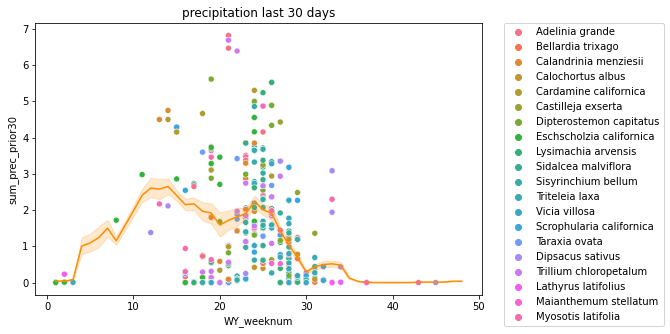

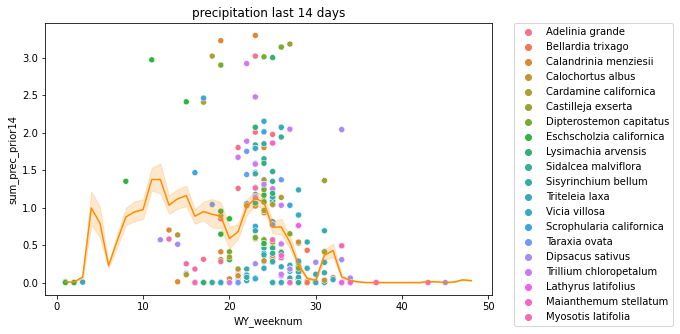

In [37]:
plt.figure(figsize = (8,5))
ax = sns.scatterplot(data=firsts, x="WY_weeknum", y="sum_prec_prior30", hue='genus_species').set(
    title="precipitation last 30 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#prior 14 days
plt.figure(figsize = (8,5))
sns.scatterplot(data=firsts, x="WY_weeknum", y="sum_prec_prior14", hue='genus_species').set(
    title="precipitation last 14 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior14']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)



_________________
<br>**Temperature**

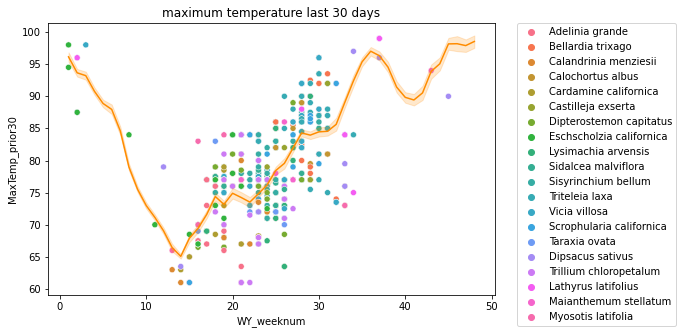

In [38]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=firsts, x="WY_weeknum", y="MaxTemp_prior30", hue='genus_species').set(
    title="maximum temperature last 30 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['MaxTemp_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#smooth with average max temp prior 30
#plt.figure(figsize = (8,5))
#sns.scatterplot(data=firsts, x="WY_weeknum", y="AvgMaxTemp_prior30", hue='genus_species').set(
#    title="average maximum daily temperature last 30 days")
#sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['AvgMaxTemp_prior30']),
#                 color='darkorange')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

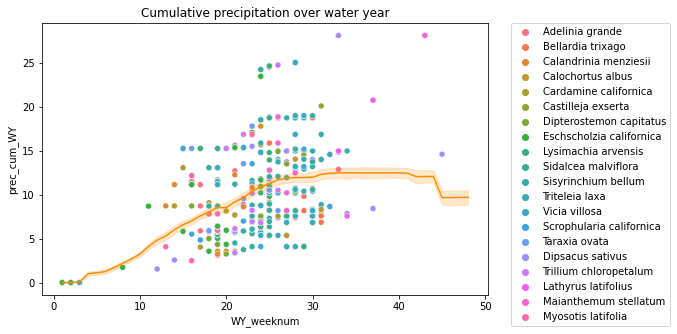

In [39]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=firsts, x="WY_weeknum", y="prec_cum_WY", hue='genus_species').set(
    title="Cumulative precipitation over water year")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['prec_cum_WY']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

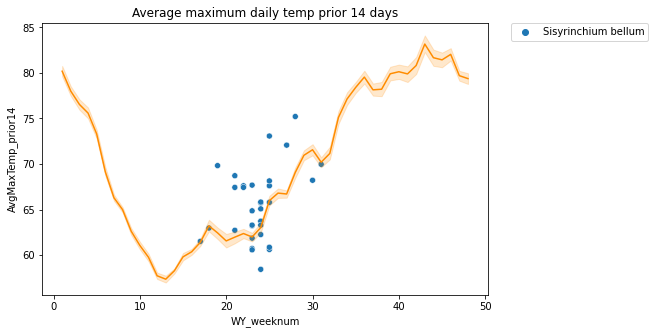

In [40]:
#should MaxTemp_prior 30 be de-trended?
sp = firsts[firsts['genus_species']=='Sisyrinchium bellum']
plt.figure(figsize = (8,5))
sns.scatterplot(data=sp, x="WY_weeknum", y="AvgMaxTemp_prior14", hue='genus_species').set(
    title="Average maximum daily temp prior 14 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['AvgMaxTemp_prior14']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

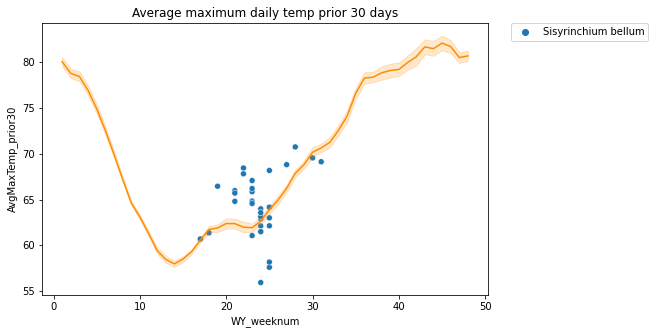

In [41]:
#should MaxTemp_prior 30 be de-trended?
sp = firsts[firsts['genus_species']=='Sisyrinchium bellum']
plt.figure(figsize = (8,5))
sns.scatterplot(data=sp, x="WY_weeknum", y="AvgMaxTemp_prior30", hue='genus_species').set(
    title="Average maximum daily temp prior 30 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['AvgMaxTemp_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

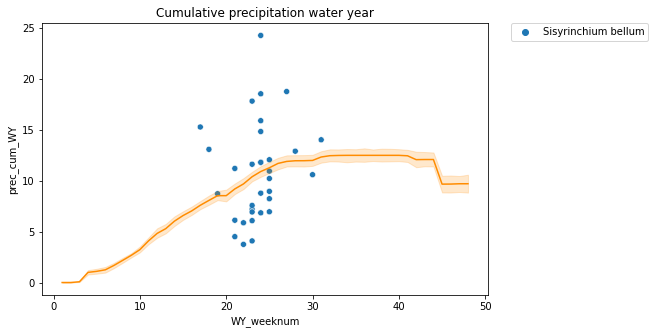

In [42]:
#should MaxTemp_prior 30 be de-trended?
sp = firsts[firsts['genus_species']=='Sisyrinchium bellum']
plt.figure(figsize = (8,5))
sns.scatterplot(data=sp, x="WY_weeknum", y="prec_cum_WY", hue='genus_species').set(
    title="Cumulative precipitation water year")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['prec_cum_WY']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

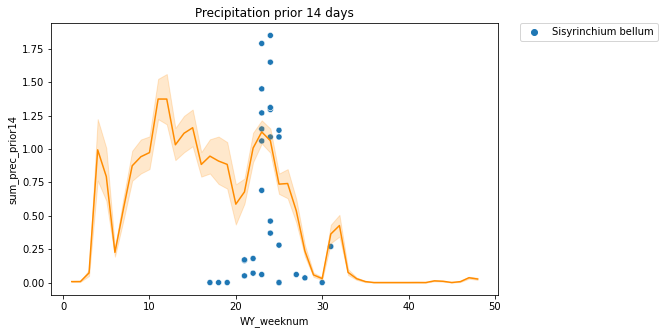

In [46]:
#should MaxTemp_prior 30 be de-trended?
sp = firsts[firsts['genus_species']=='Sisyrinchium bellum']
plt.figure(figsize = (8,5))
sns.scatterplot(data=sp, x="WY_weeknum", y="sum_prec_prior14", hue='genus_species').set(
    title="Precipitation prior 14 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior14']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

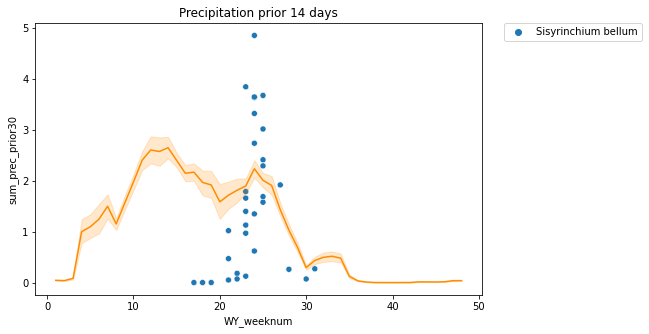

In [47]:
#should MaxTemp_prior 30 be de-trended?
sp = firsts[firsts['genus_species']=='Sisyrinchium bellum']
plt.figure(figsize = (8,5))
sns.scatterplot(data=sp, x="WY_weeknum", y="sum_prec_prior30", hue='genus_species').set(
    title="Precipitation prior 14 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

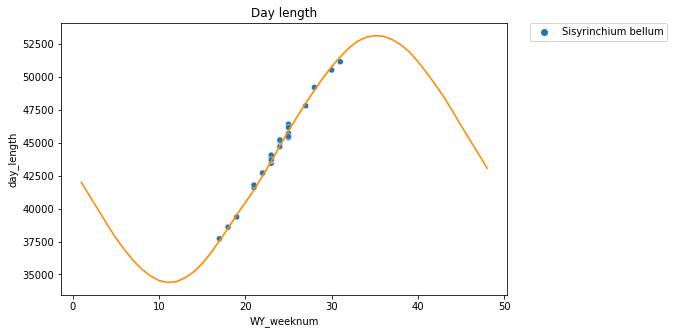

In [45]:
#should MaxTemp_prior 30 be de-trended?
sp = firsts[firsts['genus_species']=='Sisyrinchium bellum']
plt.figure(figsize = (8,5))
sns.scatterplot(data=sp, x="WY_weeknum", y="day_length", hue='genus_species').set(
    title="Day length")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['day_length']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

________________________________
# Exploring distributions through time for single species

In [51]:
print(df.shape)
df.head()

(5681, 36)


,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,genus_species,genus,species,latitude,longitude,url,image_url,minTemp,maxTemp,day_length,prec_daily,prec_cum_WY,MonSumPrec,WkSumPrec,sum_prec_prior14,sum_prec_prior30,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
31,9814624,Sunol,2018-02-10,20180210,2018,2,10,2018,5,18,Adelinia grande,Adelinia,grande,37.513283,-121.845250,https://www.inaturalist.org/observations/9814624,https://inaturalist-open-data.s3.amazonaws.com...,45.0,71.0,38302.0,0.0,5.01,0.44,0.00,0.0,0.715,79.0,41.0,72.750000,44.285714,38302.0,79.0,34.0,65.966667,43.433333,38302.0
34,9827799,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Cardamine californica,Cardamine,californica,37.526564,-121.826961,https://www.inaturalist.org/observations/9827799,https://static.inaturalist.org/photos/13455255...,39.0,62.0,38432.0,0.0,5.01,0.44,0.00,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
36,9827824,Sunol,2018-02-11,20180211,2018,2,11,2018,5,18,Dipterostemon capitatus,Dipterostemon,capitatus,37.527739,-121.823465,https://www.inaturalist.org/observations/9827824,https://static.inaturalist.org/photos/13455312...,39.0,62.0,38432.0,0.0,5.01,0.44,0.00,0.0,0.715,79.0,39.0,72.428571,44.035714,38432.0,79.0,34.0,66.066667,43.200000,38432.0
42,9896388,Sunol,2018-02-17,20180217,2018,2,17,2018,5,19,Sidalcea malviflora,Sidalcea,malviflora,37.518135,-121.810661,https://www.inaturalist.org/observations/9896388,https://static.inaturalist.org/photos/13568607...,38.0,71.0,39232.0,0.0,5.01,0.44,0.02,0.0,0.560,79.0,34.5,70.071429,41.571429,39232.0,79.0,34.0,66.750000,41.350000,39232.0
44,9896470,Sunol,2018-02-17,20180217,2018,2,17,2018,5,19,Cardamine californica,Cardamine,californica,37.524738,-121.817078,https://www.inaturalist.org/observations/9896470,https://static.inaturalist.org/photos/13568705...,38.0,71.0,39232.0,0.0,5.01,0.44,0.02,0.0,0.560,79.0,34.5,70.071429,41.571429,39232.0,79.0,34.0,66.750000,41.350000,39232.0


In [52]:
#Twenty most common species in order from most common to less
top_spp = ['Sisyrinchium bellum', 'Eschscholzia californica', 'Trillium chloropetalum', 'Castilleja exserta', 
'Dipterostemon capitatus', 'Triteleia laxa', 'Dipsacus sativus', 'Lathyrus latifolius', 
'Adelinia grande', 'Calochortus albus', 'Sidalcea malviflora', 'Calandrinia menziesii', 
'Lysimachia arvensis', 'Vicia villosa', 'Taraxia ovata', 'Bellardia trixago', 
'Myosotis latifolia', 'Scrophularia californica', 'Maianthemum stellatum', 'Cardamine californica']


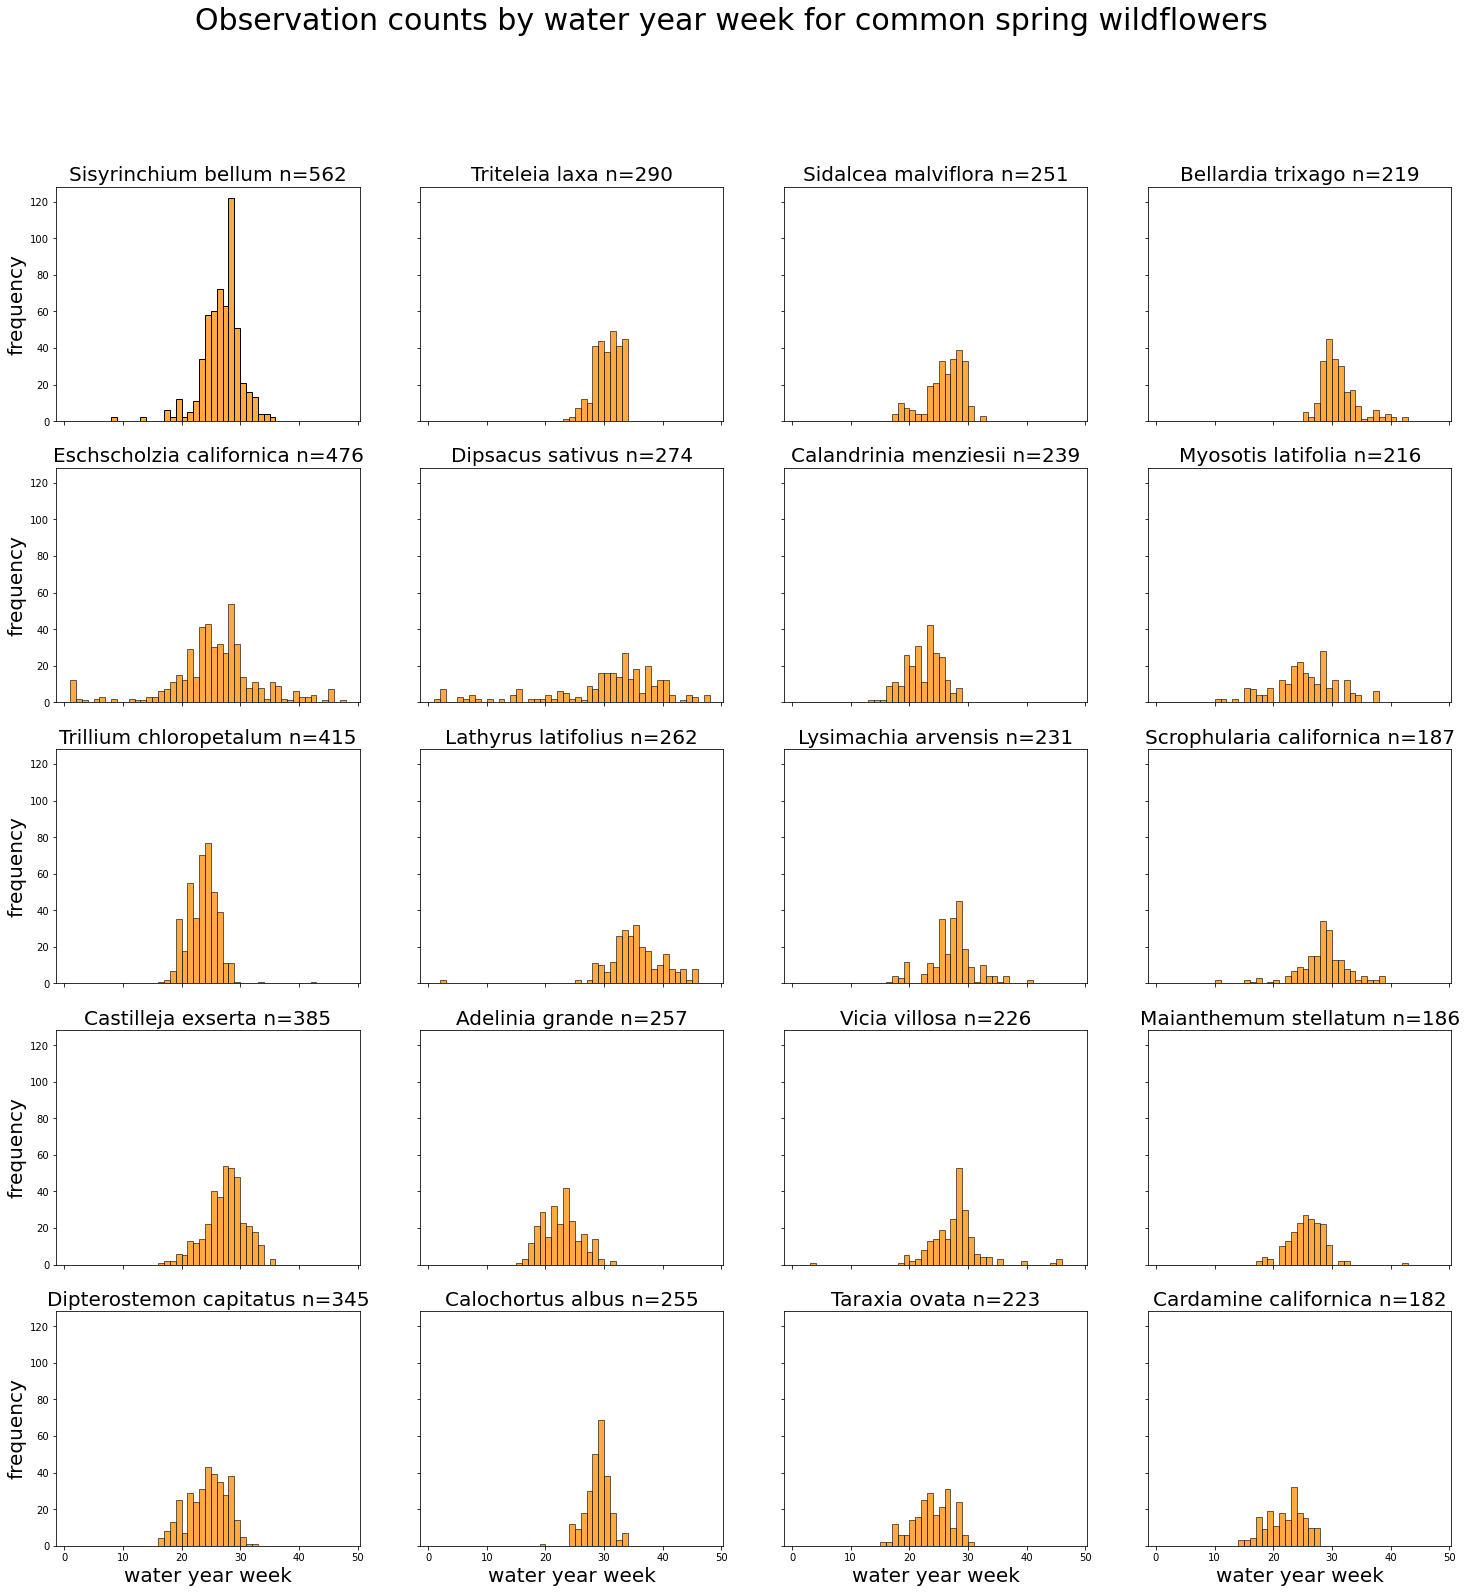

In [53]:
ax0 = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,]
ax1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
tups = list(zip(ax0 ,ax1))

fig, axes = plt.subplots(5, 4, figsize=(25, 25), sharex=True, sharey=True)
fig.suptitle('Observation counts by water year week for common spring wildflowers', fontsize=30)

for sp, ax in zip(top_spp, tups):
    sns.histplot(df[df['genus_species']==sp].sort_values(by = 'WY_weeknum', ascending = True), 
                 x="WY_weeknum", ax=axes[ax], bins = 48, binwidth=1, color='darkorange'), 
    axes[ax].set_title(sp+' n='+str(len(df[df['genus_species']==sp])), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)

__________________________________________________
# Precipitation and observed blooms

# Import precipitation data with all dates in range of study
<br>using only the data linked to dates of flower observations will result in uneven subsampling of climate data

In [54]:

#climate_daylength6 from Cap2_Climate_Daylength_wrangling-customWkWY
#aggreagated features are based on custom defined water year weeks (48 weeks) not calendar weeks (52 or 53 weeks)
climate_daylength = pd.read_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Capstone2_EDA/climate_daylength6.csv')

#start at beginning of 2017 water year
climate_daylength = climate_daylength[climate_daylength['plain_dates']>=20171001]
#climate_daylength = climate_daylength[climate_daylength['WY'].isin(['2018', '2019', '2020', '2021', '2022'])]

#add leading zeros to single digit week numbers
df['WYwk_yr'] = pd.to_numeric(df['WY'].astype(str)+df['WY_weeknum'].astype(str).str.zfill(2))
df['WYwk_yr_str'] = df['WYwk_yr'].astype(str)
df['WY_weeknum_str'] = df['WY_weeknum'].astype(str)
#df.info()

print(climate_daylength.shape)
print(climate_daylength.columns)
pd.set_option('max_columns', None)
climate_daylength.head()

(12404, 50)
Index(['Unnamed: 0', 'city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 'prec_daily',
       'prec_cum_WY', 'MonSumPrec', 'MonCumPrec', 'WkSumPrec', 'WkCumPrec',
       'minTemp', 'maxTemp', 'MonMaxTemp', 'MonMinTemp', 'MonAvgMaxTemp',
       'MonAvgMinTemp', 'WkMaxTemp', 'WkMinTemp', 'WkAvgMaxTemp',
       'WkAvgMinTemp', 'hour_rise', 'minute_rise', 'hour_set', 'minute_set',
       'day_length', 'MonMaxDayLen', 'MonMinDayLen', 'MonAvgDayLen',
       'WkMaxDayLen', 'WkMinDayLen', 'WkAvgDayLen', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'sum_prec_prior30',
       'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30',
       'AvgMinTemp_prior30', 'MaxDayLen_prior30'],
      dtype='object')


,Unnamed: 0,city,station_id,park,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,prec_daily,prec_cum_WY,MonSumPrec,MonCumPrec,WkSumPrec,WkCumPrec,minTemp,maxTemp,MonMaxTemp,MonMinTemp,MonAvgMaxTemp,MonAvgMinTemp,WkMaxTemp,WkMinTemp,WkAvgMaxTemp,WkAvgMinTemp,hour_rise,minute_rise,hour_set,minute_set,day_length,MonMaxDayLen,MonMinDayLen,MonAvgDayLen,WkMaxDayLen,WkMinDayLen,WkAvgDayLen,sum_prec_prior14,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
30,545,Concord,USW00023254,Briones,20171001,2017,10,1,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,53.0,85.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,4.0,18.0,52.0,42478.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,83.500000,55.857143,44370.0,0.03,110.0,50.0,86.433333,60.666667,46664.0
31,555,Concord,USW00023254,Briones,20171002,2017,10,2,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,83.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,5.0,18.0,50.0,42332.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,83.785714,55.357143,44225.0,0.03,106.0,50.0,85.533333,60.066667,46523.0
32,565,Concord,USW00023254,Briones,20171003,2017,10,3,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,50.0,79.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,6.0,18.0,49.0,42187.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,83.714286,54.785714,44080.0,0.03,101.0,50.0,84.633333,59.233333,46381.0
33,575,Concord,USW00023254,Briones,20171004,2017,10,4,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,50.0,82.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,7.0,18.0,47.0,42042.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,84.214286,54.071429,43934.0,0.03,101.0,50.0,84.433333,58.600000,46240.0
34,585,Concord,USW00023254,Briones,20171005,2017,10,5,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,50.0,86.0,92.0,43.0,81.354839,51.16129,90.0,50.0,84.75,51.875,7.0,8.0,18.0,46.0,41897.0,42478.0,38271.0,40339.225806,42478.0,41464.0,41970.0,0.0,93.0,50.0,85.071429,53.714286,43788.0,0.03,101.0,50.0,84.300000,57.933333,46098.0


# Plot climate and observed frequncy histogram

In [55]:
#Twenty most common species in order from most common to less
top_spp = ['Sisyrinchium bellum', 'Eschscholzia californica', 'Trillium chloropetalum', 'Castilleja exserta', 
'Dipterostemon capitatus', 'Triteleia laxa', 'Dipsacus sativus', 'Lathyrus latifolius', 
'Adelinia grande', 'Calochortus albus', 'Sidalcea malviflora', 'Calandrinia menziesii', 
'Lysimachia arvensis', 'Vicia villosa', 'Taraxia ovata', 'Bellardia trixago', 
'Myosotis latifolia', 'Scrophularia californica', 'Maianthemum stellatum', 'Cardamine californica']



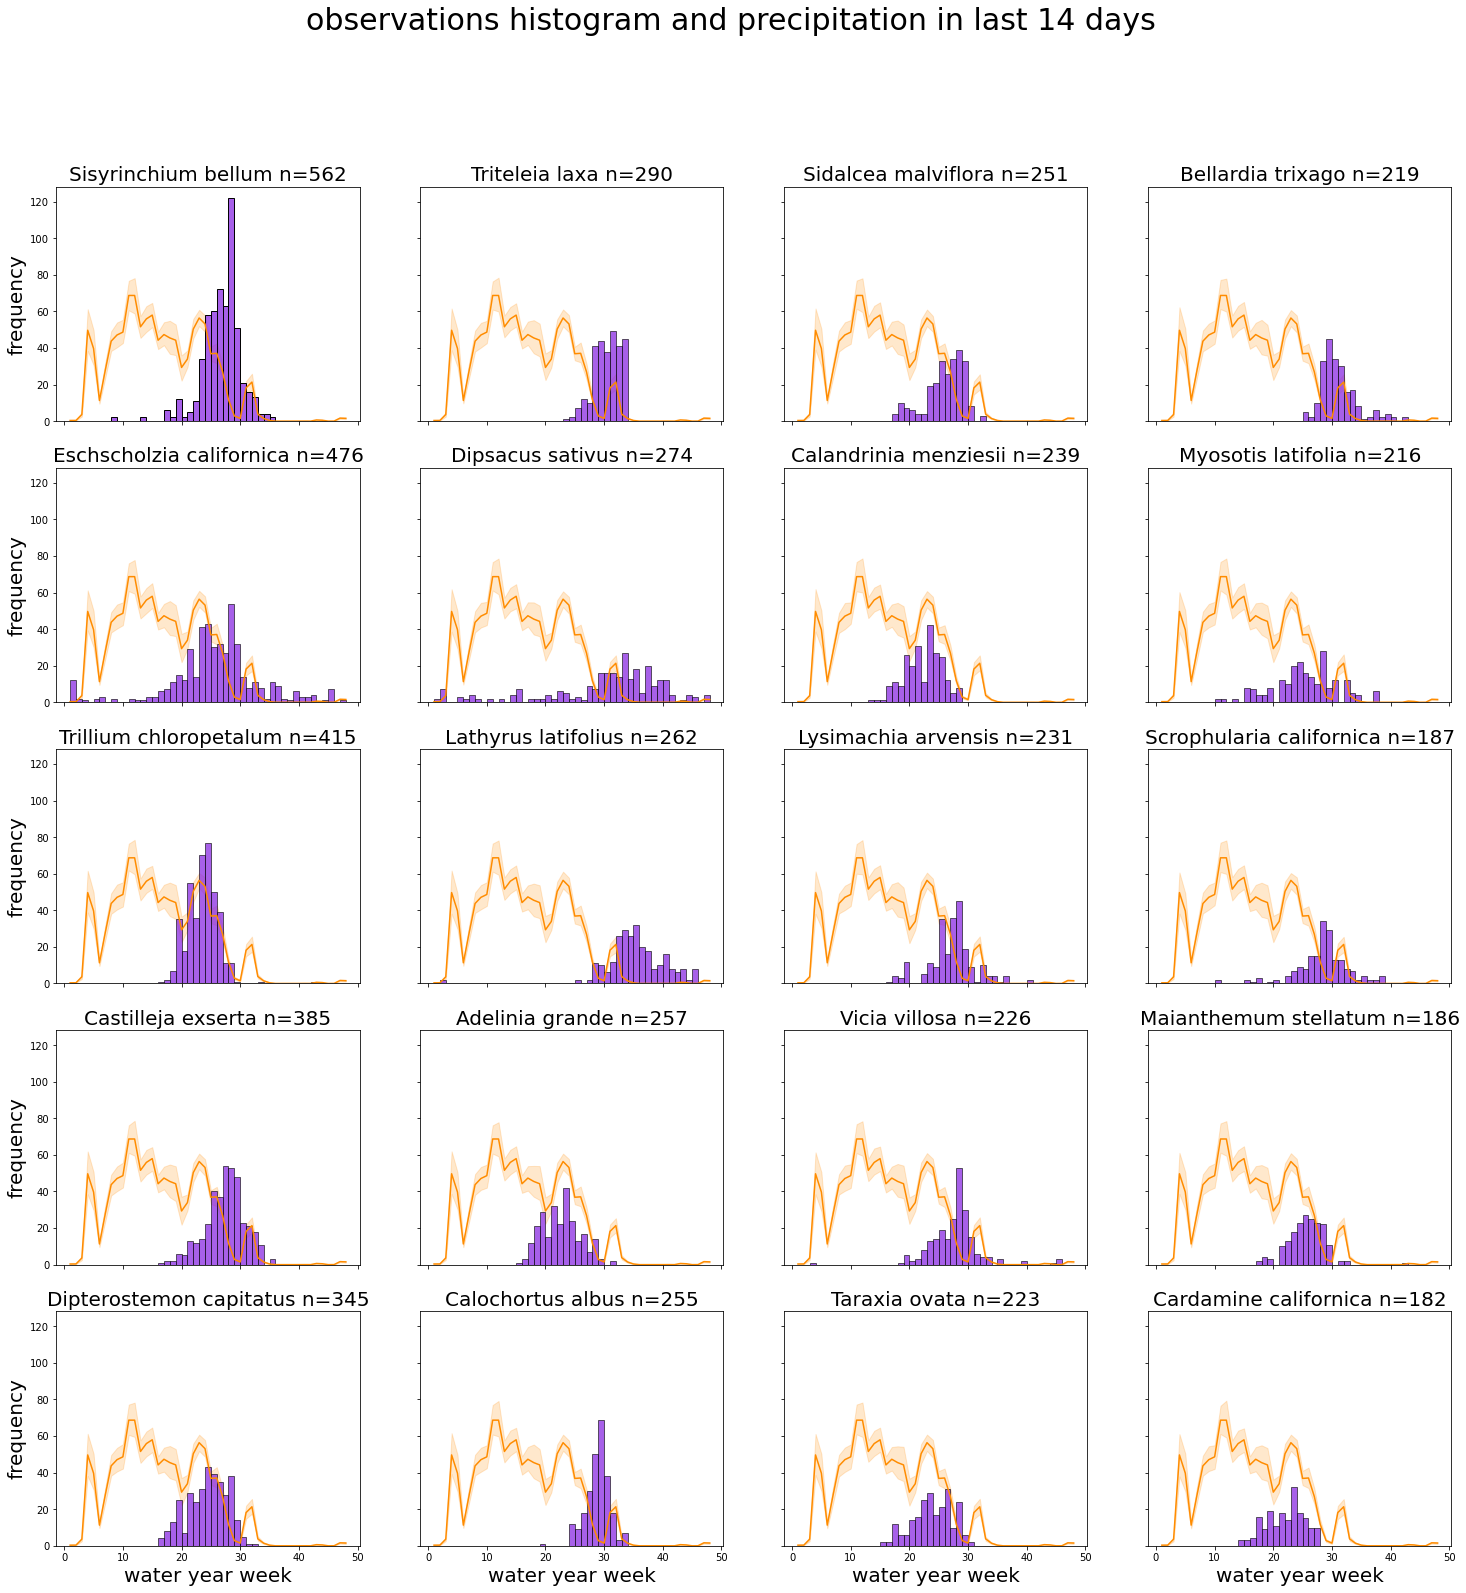

In [56]:
ax0 = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,]
ax1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
tups = list(zip(ax0 ,ax1))

fig, axes = plt.subplots(5, 4, figsize=(25, 25), sharex=True, sharey=True)
fig.suptitle('observations histogram and precipitation in last 14 days', fontsize=30)

for sp, ax in zip(top_spp, tups):
    sns.histplot(data=(df[df['genus_species']==sp]).sort_values(by = 'WY_weeknum', ascending = True), x="WY_weeknum", 
             ax=axes[ax], bins=48, binwidth=1, color='blueviolet')
    axes[ax].set_title(str(sp)+' n='+str(len(df[df['genus_species']==sp])), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)
    sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior14']*50),
                 ax=axes[ax], color='darkorange')
    #sns.lineplot(data=climate_daylength, x=(climate_daylength['WY_weeknum']+10), y=(climate_daylength['sum_prec_prior14']*50)
    #             ,ax=axes[ax], color='green')
   

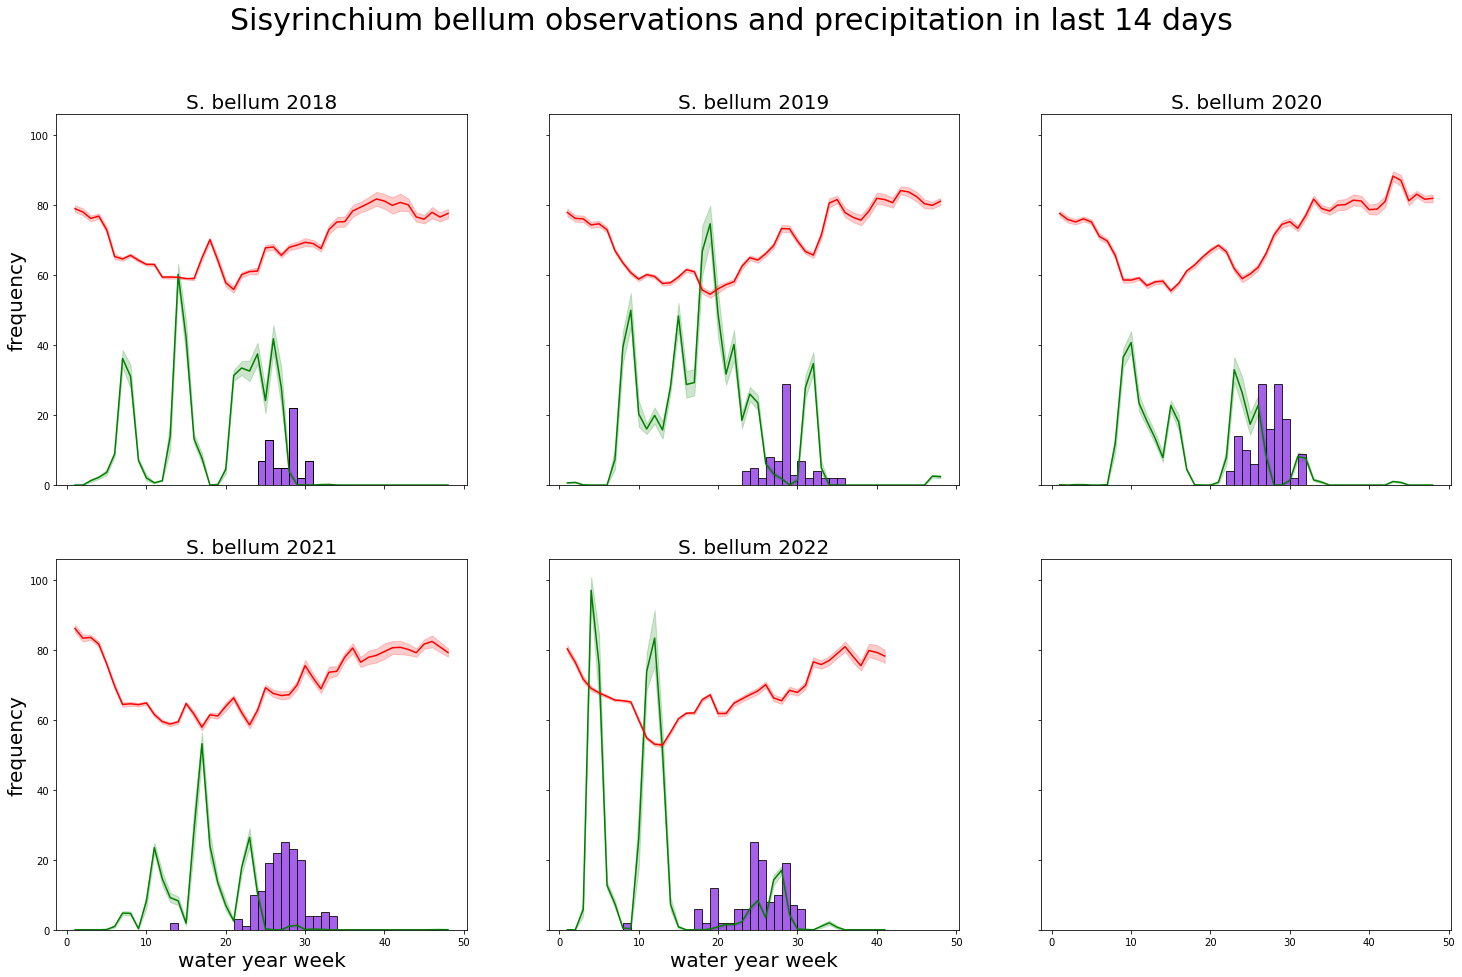

In [49]:

ax0 = [0, 1, 2, 0, 1, 2]
ax1 = [0, 0, 0, 1, 1, 1]
tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharex=True, sharey=True)
fig.suptitle('Sisyrinchium bellum observations and precipitation in last 14 days', fontsize=30)

#species dataframe
years = [2018, 2019, 2020, 2021, 2022]

for y, ax in zip(years, tups):
    data = df[(df['genus_species']=='Sisyrinchium bellum')&(df['WY']==y)]
    clim = climate_daylength[climate_daylength['WY']== y]
    sns.histplot(data=data.sort_values(by = 'WY_weeknum', ascending = True), x="WY_weeknum", 
             ax=axes[ax],bins=48, binwidth=1, color='blueviolet')
    axes[ax].set_title('S. bellum '+str(y), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)
    sns.lineplot(data=clim, x='WY_weeknum', 
                 y=(clim['sum_prec_prior14']*20),ax=axes[ax], color='green')
    sns.lineplot(data=clim, x='WY_weeknum', 
                 y=(clim['AvgMaxTemp_prior14']),ax=axes[ax], color='red')


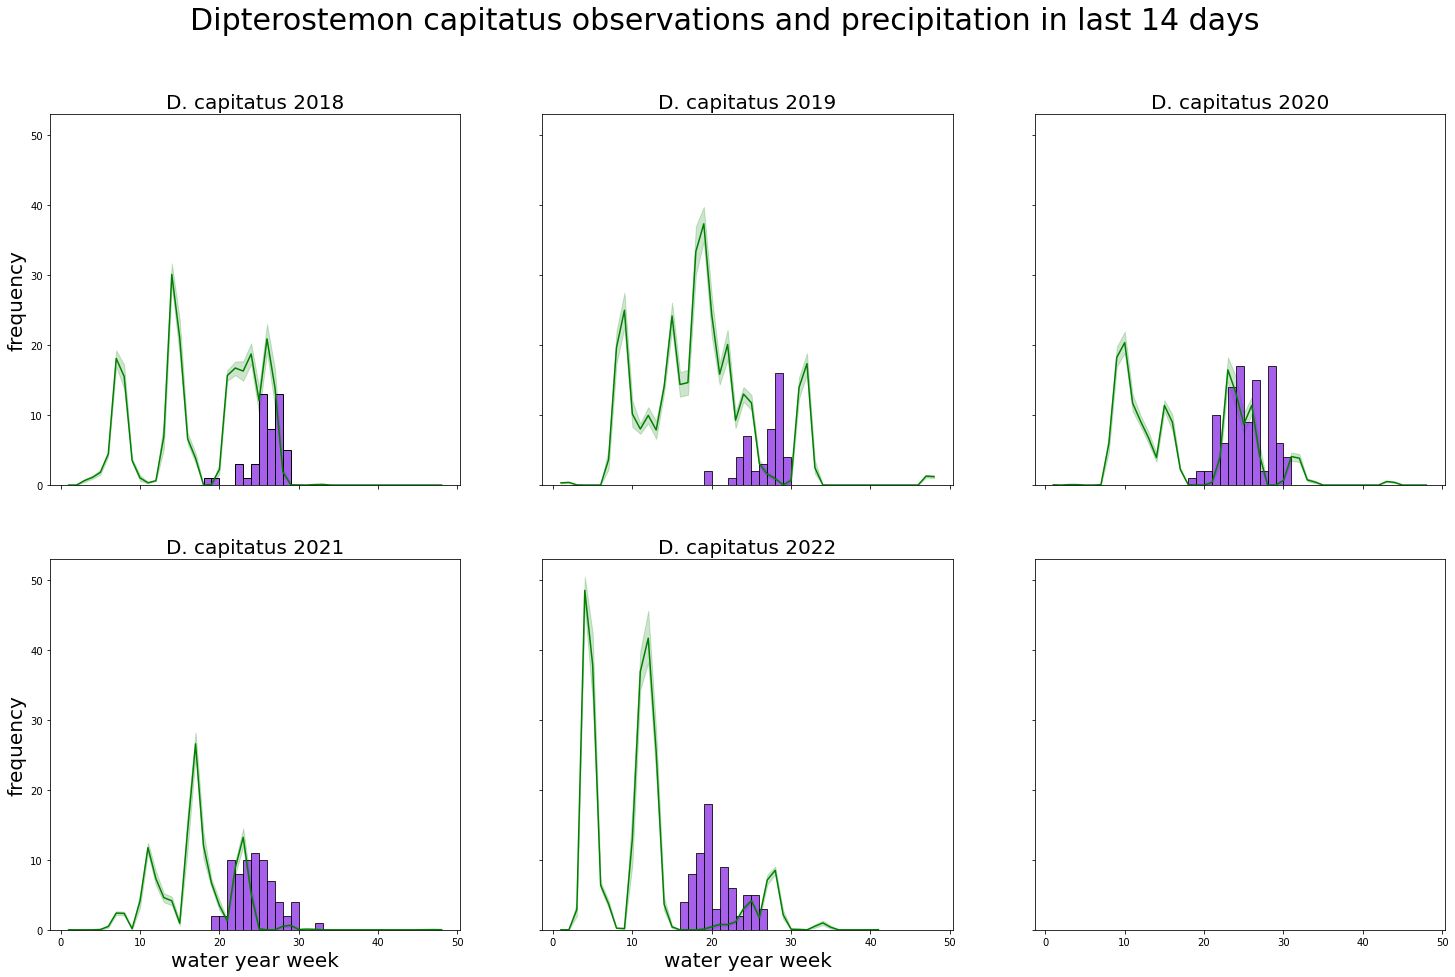

In [60]:
ax0 = [0, 1, 2, 0, 1, 2]
ax1 = [0, 0, 0, 1, 1, 1]
tups = list(zip(ax1 ,ax0))

fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharex=True, sharey=True)
fig.suptitle('Dipterostemon capitatus observations and precipitation in last 14 days', fontsize=30)

#species dataframe
years = [2018, 2019, 2020, 2021, 2022]

for y, ax in zip(years, tups):
    data = df[(df['genus_species']=='Dipterostemon capitatus')&(df['WY']==y)]
    clim = climate_daylength[climate_daylength['WY']== y]
    sns.histplot(data=data.sort_values(by = 'WY_weeknum', ascending = True), x="WY_weeknum", 
             ax=axes[ax],bins=48, binwidth=1, color='blueviolet')
    axes[ax].set_title('D. capitatus '+str(y), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)
    sns.lineplot(data=clim, x='WY_weeknum', 
                 y=(clim['sum_prec_prior14']*10),ax=axes[ax], color='green')

